### Name: C Vamshi Krishna
### Roll no: AM.EN.U4ELC19043

## Import required tools

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

## Define a perceptron class

In [60]:
class Perceptron(object):
    
   def __init__(self, rate = 0.01, epoch = 10):
      self.rate = rate
      self.epoch = epoch

   def fit(self, X, y):
    
      # initialize weights
      self.weight = np.zeros(1 + X.shape[1])

      # store losses
      self.errors = []

      for i in range(self.epoch):
         err = 0
         for xi, target in zip(X, y):
            
            # Calculate gradient
            loss = self.rate * (target - self.predict(xi))

            # gradient descent
            self.weight[1:] += loss * xi
            self.weight[0] += loss
            
            # add up losses to store after each epoch
            err += int(loss != 0.0)

         self.errors.append(err)
      return self

   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.net_input(X) >= 0.0, 1, -1)
    
   def weights(self):
      return self.weight

## Load the data into a dataframe

In [61]:
df = pd.read_csv('iris.data', header=None)
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

## Vizualize the 4-feature data

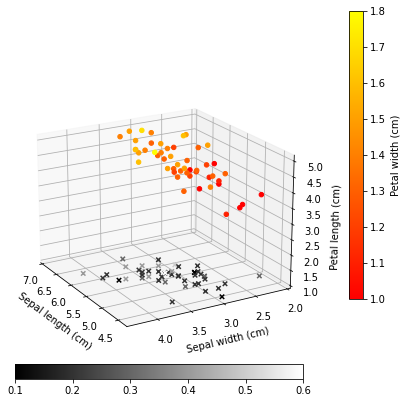

In [62]:
fig = plt.figure()
ax = Axes3D(fig)

img1 = ax.scatter(X[50:, 0], X[50:, 1], X[50:, 2], c = X[50:, 3], marker='o', cmap=plt.autumn(), alpha=1, s=20)
img2 = ax.scatter(X[:50, 0], X[:50, 1], X[:50, 2], c = X[:50, 3], marker='x', cmap=plt.gray(), alpha=1, s=20)
ax.view_init(elev=20., azim=150)

ax.set_xlim(df.min()[0], df.max()[0])
ax.set_ylim(df.min()[1], df.max()[1])
ax.set_zlim(df.min()[2], df.max()[2])

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal length (cm)')

f = fig.colorbar(img1, 
                 cax=inset_axes(ax,width="5%",height="100%",borderpad=-6), 
                 orientation="vertical")

fig.colorbar(img2,
             inset_axes(ax,width="100%",height="5%",loc='lower center',borderpad=-2),
             orientation="horizontal")
f.set_label('Petal width (cm)')
plt.show()

## Train the model and plot the losses

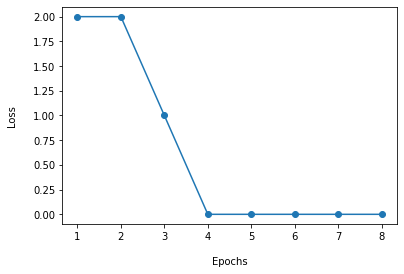

In [63]:
pn4 = Perceptron(0.1, 8)
pn4.fit(X, y)
plt.plot(range(1, len(pn4.errors)+1 ), pn4.errors, marker='o')
plt.xlabel('\nEpochs')
plt.ylabel('Loss\n')
plt.show()

#### Since plotting a decision boundary with 4D data on a 3D space or decision boundary with 3D data on 3D space is a challenging task, we have to drop any two features

So we will drop Sepal and Petal width and plot the features

#### Redefine the features

In [64]:
X = np.delete(X, [1, 3], axis=1)

### Plot the 2D features

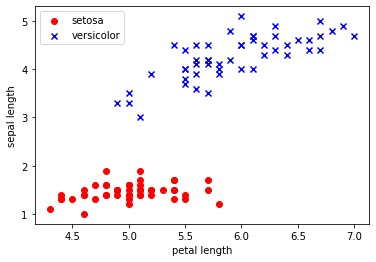

In [65]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

### Train the perceptron and plot the losses

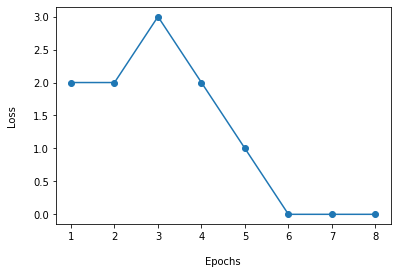

In [66]:
pn2 = Perceptron(0.1, 8)
pn2.fit(X, y)
plt.plot(range(1, len(pn2.errors)+1 ), pn2.errors, marker='o')
plt.xlabel('\nEpochs')
plt.ylabel('Loss\n')
plt.show()

### A function to draw the decision boundary 

In [67]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))

   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)

   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):

      plt.scatter(x=X[y == cl, 0], 
                  y=X[y == cl, 1],
                  alpha=0.8, 
                  c=cmap(idx),
                  marker=markers[idx], 
                  label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


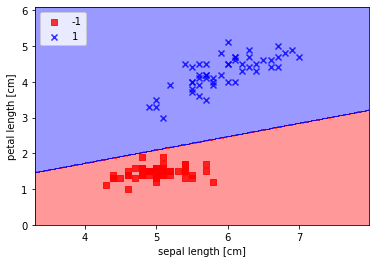

In [68]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Observation

When there were 4 features, the loss was 0 at 4th epoch. Whereas when we trained the perceptron on 2 features, the loss was 0 at 6th epoch.

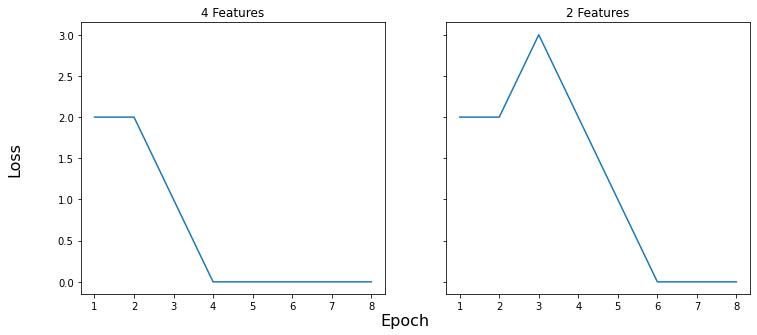

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,5))

fig.text(0.5, 0.04, 'Epoch', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Loss', va='center', rotation='vertical', fontsize=16)

ax1.plot(range(1, len(pn4.errors)+1 ), pn4.errors)
ax1.set_title("4 Features");
ax2.plot(range(1, len(pn2.errors)+1 ), pn2.errors)
ax2.set_title("2 Features");